In [1]:
!pip install matplotlib keras sklearn opencv-python==3.4.11.45 opencv-contrib-python==3.4.11.45

     |████████████████████████████████| 49.1 MB 119 kB/s 
     |████████████████████████████████| 54.7 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import math
import zipfile
import random
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# Just to unzip the zip file inside drive for google colab usage
# with zipfile.ZipFile('/content/drive/MyDrive/Dataset/imageDataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Dataset/imageDataset')

In [3]:
# Function to get keypoints and descriptors from an image using SIFT
def getDescriptors(sift, img):
  keypoint, descriptor = sift.detectAndCompute(img, None)
  return descriptor

# Function tostack descriptors vertically using numpy
def vstackDescriptors(descriptor_list):
  # Converting descriptors list to numpy array
  descriptors = np.array(descriptor_list[0])
  # Loop over the descriptor list to stack them using numpy
  for descriptor in descriptor_list[1:]:
      descriptors = np.vstack((descriptors, descriptor)) 

  return descriptors

# Function to cluster similar descriptors using KMeans clustering
def clusterDescriptors(descriptors, no_clusters):
  kmeans = KMeans(n_clusters = no_clusters).fit(descriptors)
  return kmeans

# Function to extract features from images using Kmeans clustering, descriptor list an image count
def extractFeatures(kmeans, descriptor_list, image_count, no_clusters):
  # Make numpy array of zeroes as per number of clusters for total number of images we have 
  im_features = np.array([np.zeros(no_clusters) for i in range(image_count)])

  # Iterate over total images
  for i in range(image_count):
      # Iterate over descriptors list
      for j in range(len(descriptor_list[i])):
          # Extract features from descriptor list and reshape to 1x128
          feature = descriptor_list[i][j]
          feature = feature.reshape(1, 128)
          # Predict class to which feature belongs
          idx = kmeans.predict(feature)
          # Repeat the procedure for all features of the image
          im_features[i][idx] += 1

  return im_features


# Function to normalize the features
def normalizeFeatures(scale, features):
  return scale.transform(features)


# Function to plot histogram of feature of images with respect to number of clusters
def plotHistogram(im_features, no_clusters):
  # On x-axis we have no of clusters and for y axis we have occurences of features for that cluster
  x_scalar = np.arange(no_clusters)
  y_scalar = np.array([abs(np.sum(im_features[:,h], dtype=np.int32)) for h in range(no_clusters)])

  plt.bar(x_scalar, y_scalar)
  plt.xlabel("Visual Word Index")
  plt.ylabel("Frequency")
  plt.title("Complete Vocabulary Generated")
  plt.xticks(x_scalar + 0.4, x_scalar)
  plt.show()

In [4]:
X_train = []
y_train = []
X_test = []
y_test = []

# Loop through all 10 folders of dataset
for path in glob.glob("/content/drive/MyDrive/Dataset/imageDataset/000*/"):
  # Open the train.txt file and read in line by line
  with open(path + "train.txt") as file:
    for train_image_path in file.readlines():
      # Extract path of image to be used as trained data and make full path to read image
      full_path = path + train_image_path[:-1]

      # One of the file was corrupted due to which code was throwing exception so try except block is for such types of error handling
      try:
        image = cv2.imread(full_path, 0) # Read image from full path
        resized_image = cv2.resize(image, (150, 150)) # Resize image and make it square of size 256x256
        X_train.append(resized_image) # Append image in X_train list
        
        # Get two second last characters from path (folder name) which represents class name
        # Convert it to integer and subtract 1 from it to avoid one-hot encoding or label-encoding procedure for converting categorical classes
        # So now labels for classes are integer (0-9) instead of (1-10)
        y_train.append(int(path[-3:-1]) - 1) # Append classes names in y_train list
      except:
        print("Something went wrong with file: ", full_path)

  # Repeat the same procedure for extracting test dataset
  with open(path + "test.txt") as file:
    for test_image_path in file.readlines():
      full_path = path + test_image_path[:-1]
      try:
        image = cv2.imread(full_path)
        resized_image = cv2.resize(image, (150, 150))
        X_test.append(resized_image)
        y_test.append(int(path[-3:-1]) - 1)
      except:
        print("Something went wrong with file: ", full_path)

Something went wrong with file:  /content/drive/MyDrive/Dataset/imageDataset/00009/01242_00002.ppm


In [5]:
# Just printing train data size and test data size 
print("Train data size: ", len(X_train)) 
print("Test data size: ", len(X_test))

Train data size:  799
Test data size:  200


In [6]:
!pip uninstall opencv-python -y
!pip uninstall opencv-contrib-python -y
!pip install opencv-python==3.4.11.45
!pip install opencv-contrib-python==3.4.11.45

Found existing installation: opencv-python 3.4.11.45
Uninstalling opencv-python-3.4.11.45:
  Successfully uninstalled opencv-python-3.4.11.45
Found existing installation: opencv-contrib-python 3.4.11.45
Uninstalling opencv-contrib-python-3.4.11.45:
  Successfully uninstalled opencv-contrib-python-3.4.11.45
  Using cached opencv_python-3.4.11.45-cp37-cp37m-manylinux2014_x86_64.whl (49.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached opencv_contrib_python-3.4.11.45-cp37-cp37m-manylinux2014_x86_64.whl (54.7 MB)


In [7]:
def train_model(X_train, no_clusters):
  descriptor_list = []

  # Loop over train images
  for image in X_train:
    # Apply SIFT and get descriptors of images and append in a list of descriptors
    sift = cv2.xfeatures2d.SIFT_create()
    descriptor = getDescriptors(sift, image)
    descriptor_list.append(descriptor)
  
  # Vstack descriptors
  descriptors = vstackDescriptors(descriptor_list)
  print("Descriptors vstacked......")

  # Cluster descriptors using Kmeans
  kmeans = clusterDescriptors(descriptors, no_clusters)
  print("Descriptors clustered......")

  # Extract train images features
  train_features = extractFeatures(kmeans, descriptor_list, len(X_train), no_clusters)
  print("Train images features extracted......")

  # Normalize the train images features
  scale = StandardScaler().fit(train_features)        
  train_features = scale.transform(train_features)
  print("Train images normalized......\n")

  # Plot histogram of train images features
  plotHistogram(train_features, no_clusters)

  return kmeans, scale, train_features

In [8]:
def test_model(X_test, kmeans, scale, im_features, no_clusters):
  descriptor_list = []

  # Loop over test images
  for image in X_test:
    # Apply SIFT and get descriptors of images and append in a list of descriptors
    sift = cv2.xfeatures2d.SIFT_create()
    descriptor = getDescriptors(sift, image)
    descriptor_list.append(descriptor)
  
  # Vstack descriptors
  descriptors = vstackDescriptors(descriptor_list)
  print("Descriptors vstacked......")

  # Extract test images features
  test_features = extractFeatures(kmeans, descriptor_list, len(X_test), no_clusters)
  print("Test images features extracted......")

  # Scale test features
  test_features = scale.transform(test_features)
  print("Test images scaled......\n")

  return test_features

Descriptors vstacked......
Descriptors clustered......
Train images features extracted......
Train images normalized......



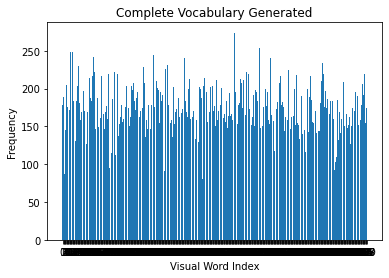

In [9]:
no_clusters = 500

# Call train_model() to get train_features, scale and kmeans
kmeans, scale, train_features = train_model(X_train, no_clusters)

In [10]:
# Pass kmeans, scale and train_features you got from train model along with no of clusters and test images to extract test images features
test_features = test_model(X_test, kmeans, scale, train_features, no_clusters)

Descriptors vstacked......
Test images features extracted......
Test images scaled......



In [11]:
# Fit train images features and labels using SVM classifier
svm = SVC().fit(train_features, np.array(y_train))

In [12]:
# Predict the labels of test features using previously trained SVM model
predictions = svm.predict(test_features)

In [13]:
# Converting y_predicted labels list and y_test labels list to numpy
y_predicted = np.array(predictions)
y_test = np.array(y_test)

# Getting difference of y_test and y_predicted class to compute different things like (correctly classified, false positives etc)
difference = y_test - y_predicted

# Calculating precision, recall and f_score
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_predicted, average='micro')

In [14]:
print('Correctly classified: ', np.where(difference == 0)[0].shape[0])
print('Incorrectly classified: ', np.where(difference != 0)[0].shape[0])
print('False positives: ', np.where(difference == -1)[0])
print('False negatives: ', np.where(difference == 1)[0])

print('\nPrecision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('Fscore: {:.3f}'.format(f_score))

print('\nAccuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))

Correctly classified:  163
Incorrectly classified:  37
False positives:  [101 103 104 105 107 110 112 113 117 118 125]
False negatives:  []

Precision: 0.815
Recall: 0.815
Fscore: 0.815

Accuracy: 0.815


In [15]:
# Getting correctly and incorrectly classified images
correctly_classified = np.where(difference == 0)[0]
incorrectly_classified = np.where(difference != 0)[0]

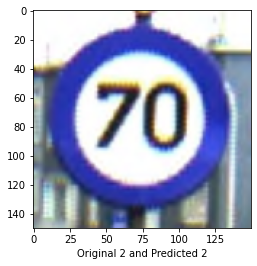

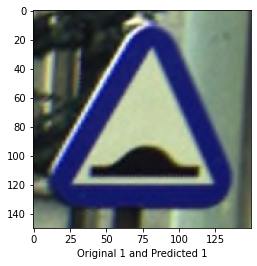

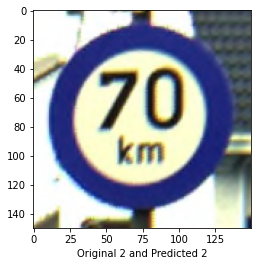

In [25]:
# Displaying 3 random images from correctly classified ones
for i in range(3):
  index = random.randint(0, len(correctly_classified))
  plt.imshow(X_test[correctly_classified[index]])
  plt.xlabel("Original {} and Predicted {}".format(y_test[correctly_classified[index]] + 1, y_predicted[correctly_classified[index]] + 1))
  plt.show()

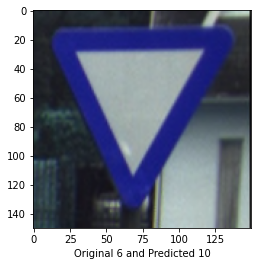

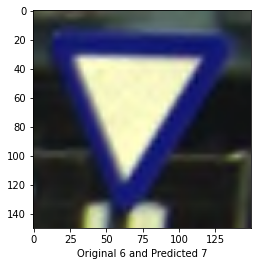

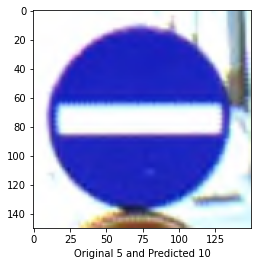

In [21]:
# Displaying 3 random images from incorrectly classified ones
for i in range(3):
  index = random.randint(0, len(incorrectly_classified))
  plt.imshow(X_test[incorrectly_classified[index]])

  # Showing the original class and predicted class as label
  plt.xlabel("Original {} and Predicted {}".format(y_test[incorrectly_classified[index]] + 1, y_predicted[incorrectly_classified[index]] + 1))
  plt.show()